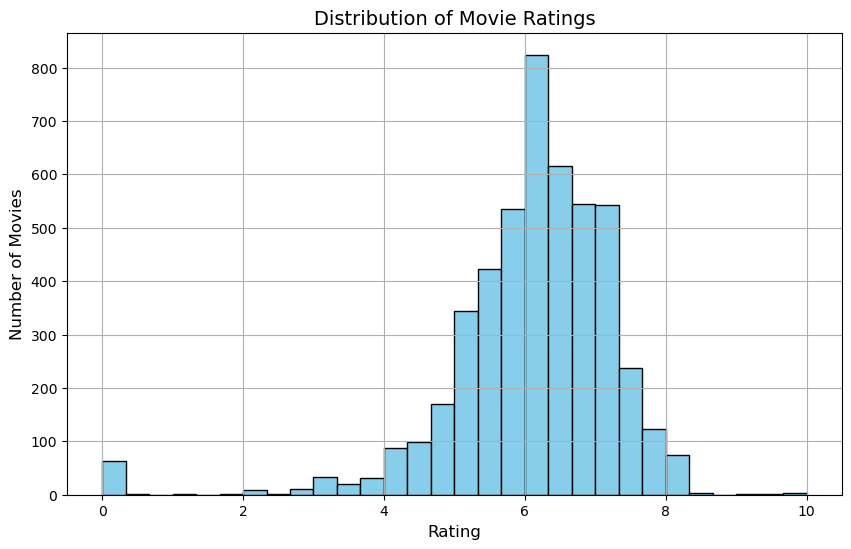

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import pickle
import requests
import streamlit as st
import time
from nltk.stem.porter import PorterStemmer

# Load data
movies = pd.read_csv('/Users/nandhinivijayakumar/Desktop/ADM/Project/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/nandhinivijayakumar/Desktop/ADM/Project/tmdb_5000_credits.csv')

# Plot distribution of movie ratings
def plot_rating_distribution(movies):
    plt.figure(figsize=(10,6))
    plt.hist(movies['vote_average'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Movie Ratings', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.grid(True)
    plt.show()

plot_rating_distribution(movies)


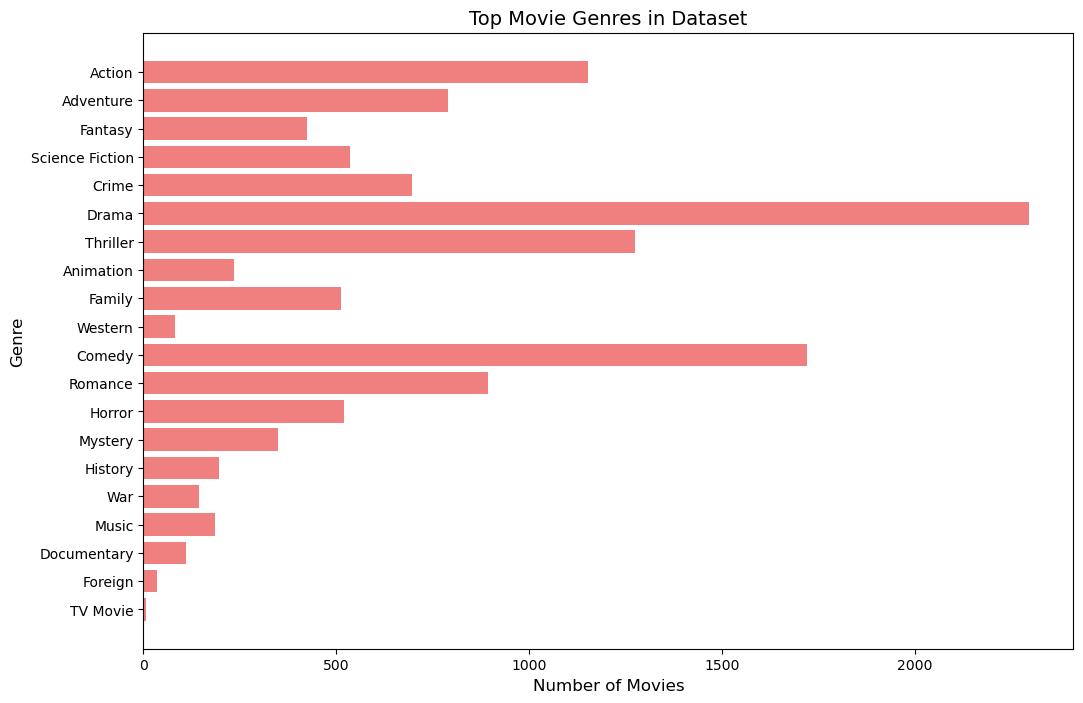

In [9]:

# Helper function to convert JSON columns into lists of strings (ensure it's a list)
def convert(obj):
    try:
        return [i['name'] for i in ast.literal_eval(obj)] if isinstance(obj, str) else []
    except Exception as e:
        return []

# Apply conversion functions
movies['genres'] = movies['genres'].apply(convert)

from collections import Counter

# Count the number of movies in each genre
def plot_genre_distribution(movies):
    all_genres = sum(movies['genres'], [])  # Flatten the list of genres
    genre_counts = Counter(all_genres)

    genres, counts = zip(*genre_counts.items())

    plt.figure(figsize=(12,8))
    plt.barh(genres, counts, color='lightcoral')
    plt.title('Top Movie Genres in Dataset', fontsize=14)
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.gca().invert_yaxis()  # To display the highest count at the top
    plt.show()

plot_genre_distribution(movies)


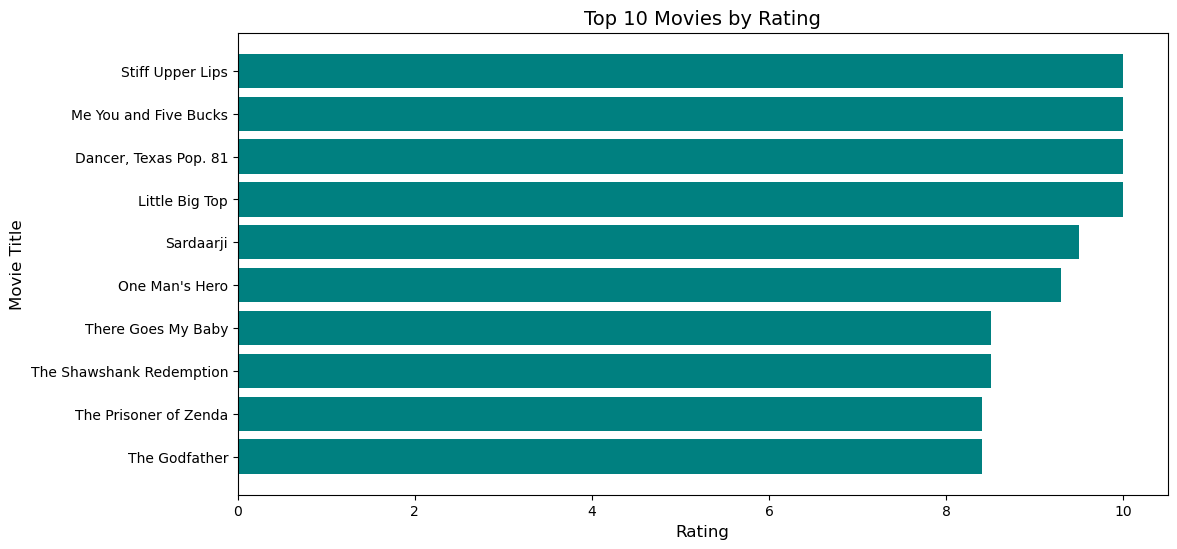

In [3]:
# Plot the top 10 movies with the highest ratings
def plot_top_rated_movies(movies):
    top_rated_movies = movies[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)
    
    plt.figure(figsize=(12,6))
    plt.barh(top_rated_movies['title'], top_rated_movies['vote_average'], color='teal')
    plt.title('Top 10 Movies by Rating', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Movie Title', fontsize=12)
    plt.gca().invert_yaxis()  # To display the highest rating at the top
    plt.show()

plot_top_rated_movies(movies)


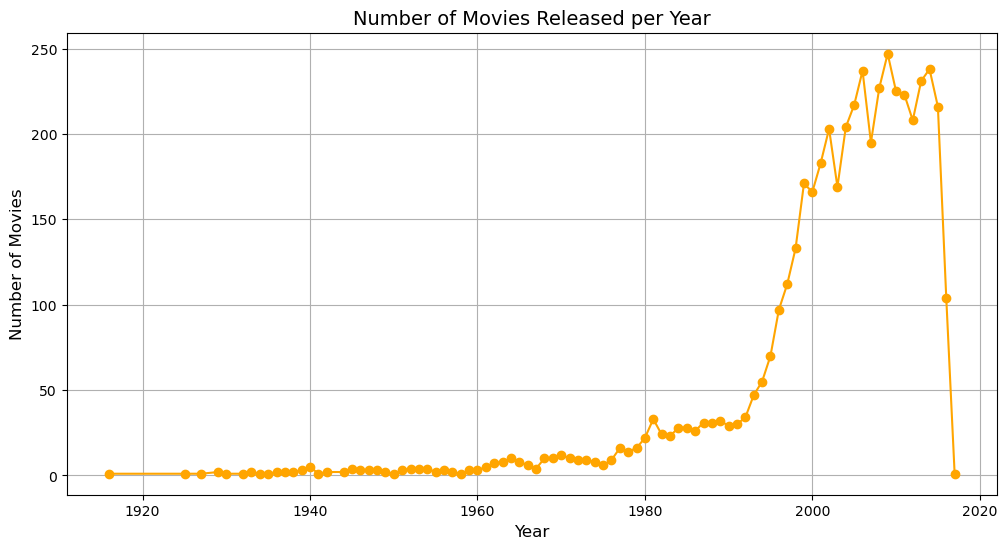

In [4]:
# Extract the release year from the release date
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Plot the number of movies released per year
def plot_movies_per_year(movies):
    movies_per_year = movies['release_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12,6))
    plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='orange')
    plt.title('Number of Movies Released per Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.grid(True)
    plt.show()

plot_movies_per_year(movies)

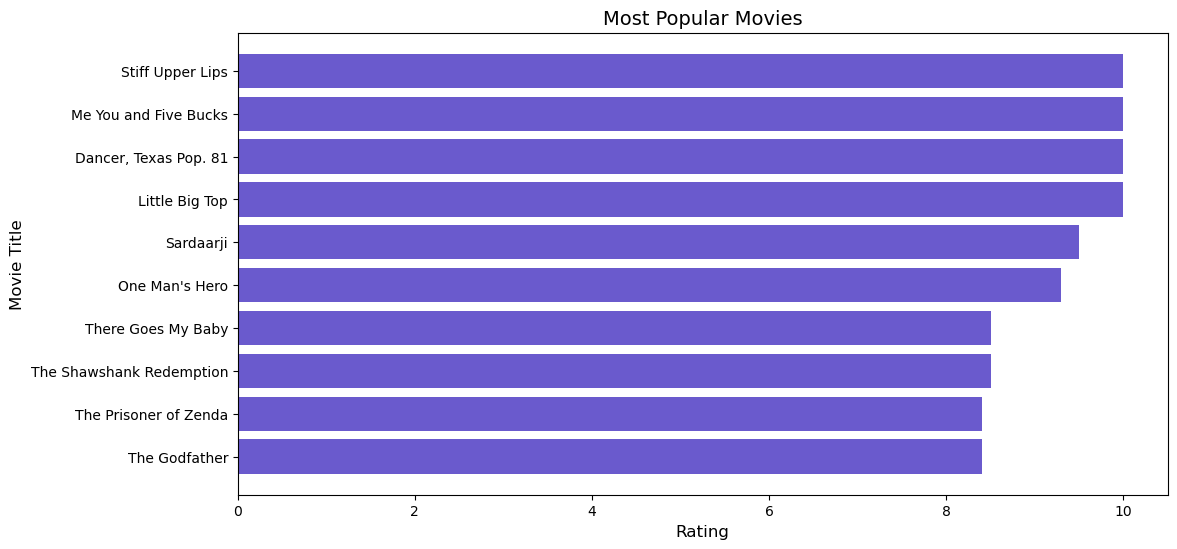

In [6]:

# Plot the top 10 most popular movies
def plot_most_popular_movies(movies):
    most_popular = movies[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

    plt.figure(figsize=(12,6))
    plt.barh(most_popular['title'], most_popular['vote_average'], color='slateblue')
    plt.title('Most Popular Movies', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Movie Title', fontsize=12)
    plt.gca().invert_yaxis()  # To display the highest rating at the top
    plt.show()

plot_most_popular_movies(movies)


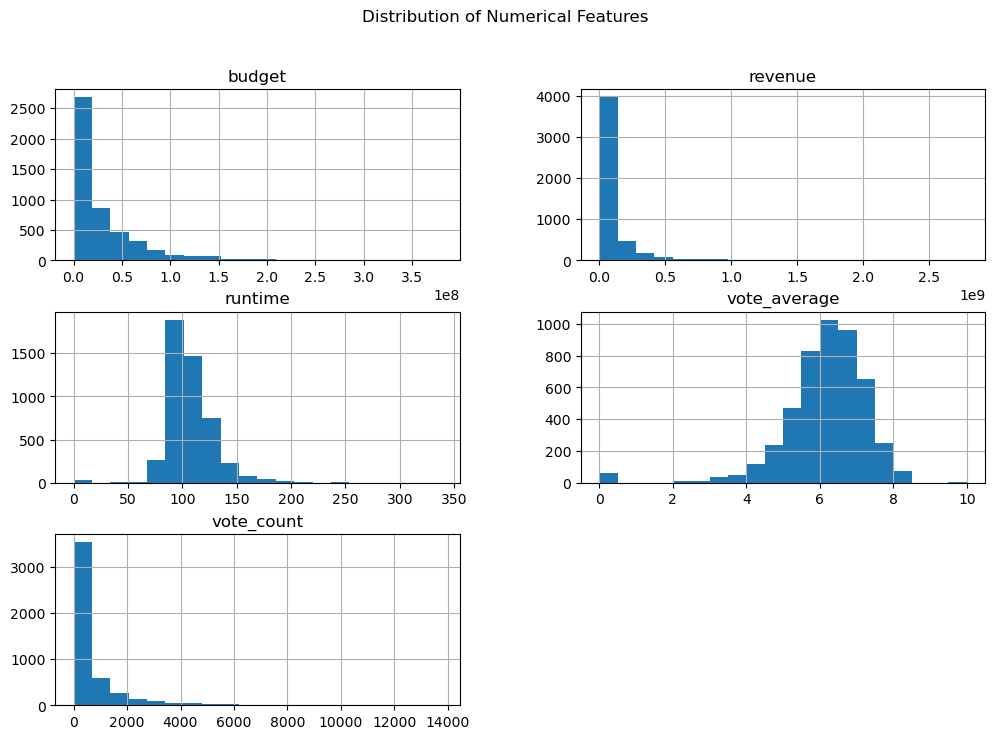

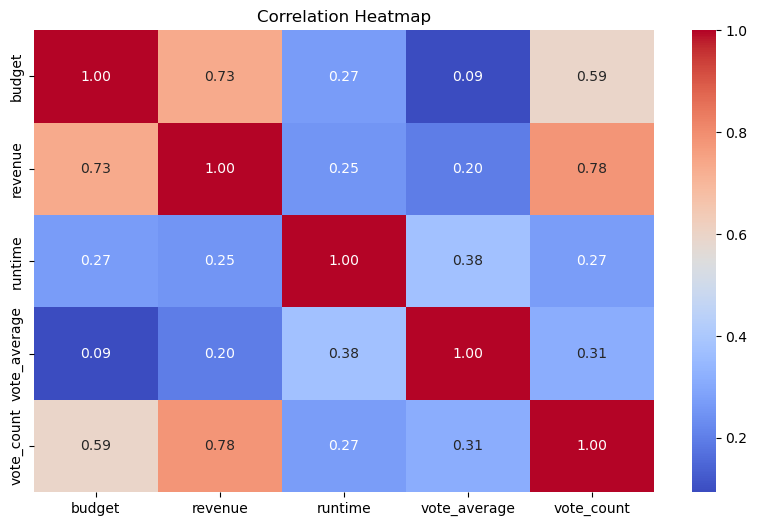

In [15]:
# Plot histograms for numerical columns
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()
# Plot correlation heatmap
correlation_matrix = movies[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


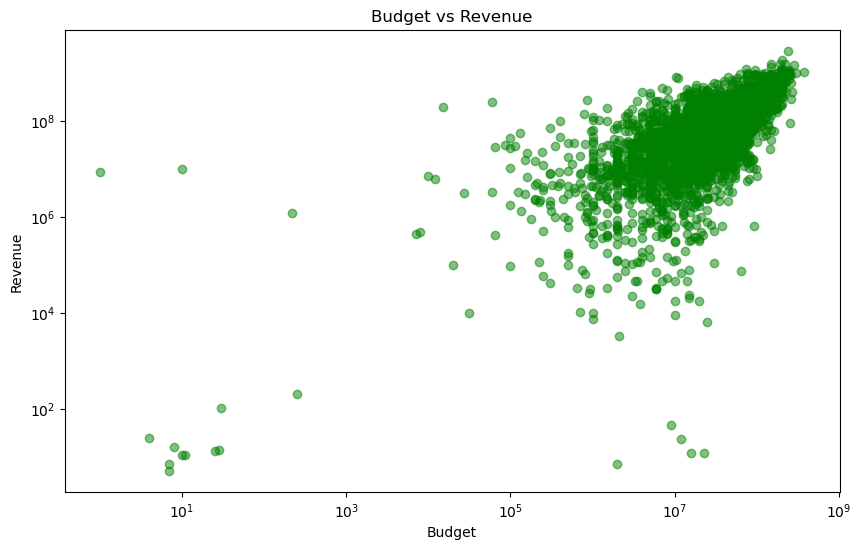

In [18]:
# Scatter plot of budget vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(movies['budget'], movies['revenue'], alpha=0.5, color='green')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()


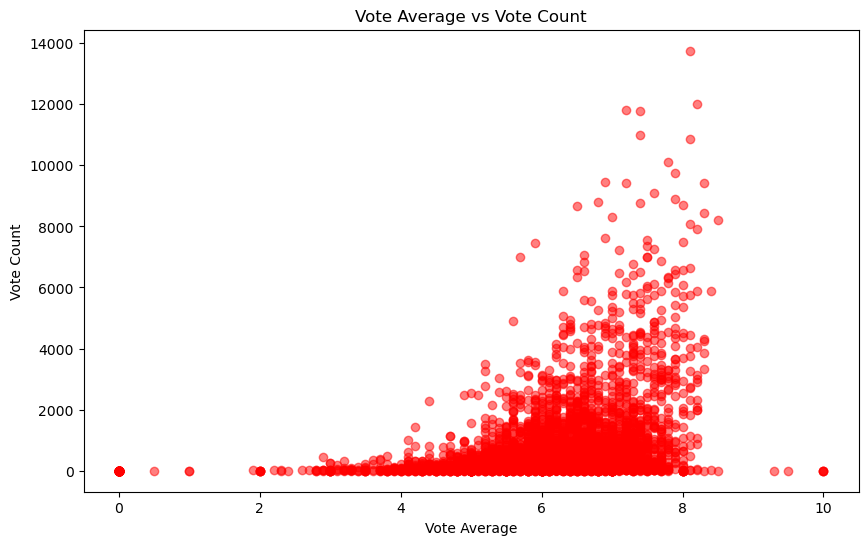

In [19]:
# Scatter plot of vote average vs vote count
plt.figure(figsize=(10, 6))
plt.scatter(movies['vote_average'], movies['vote_count'], alpha=0.5, color='red')
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()


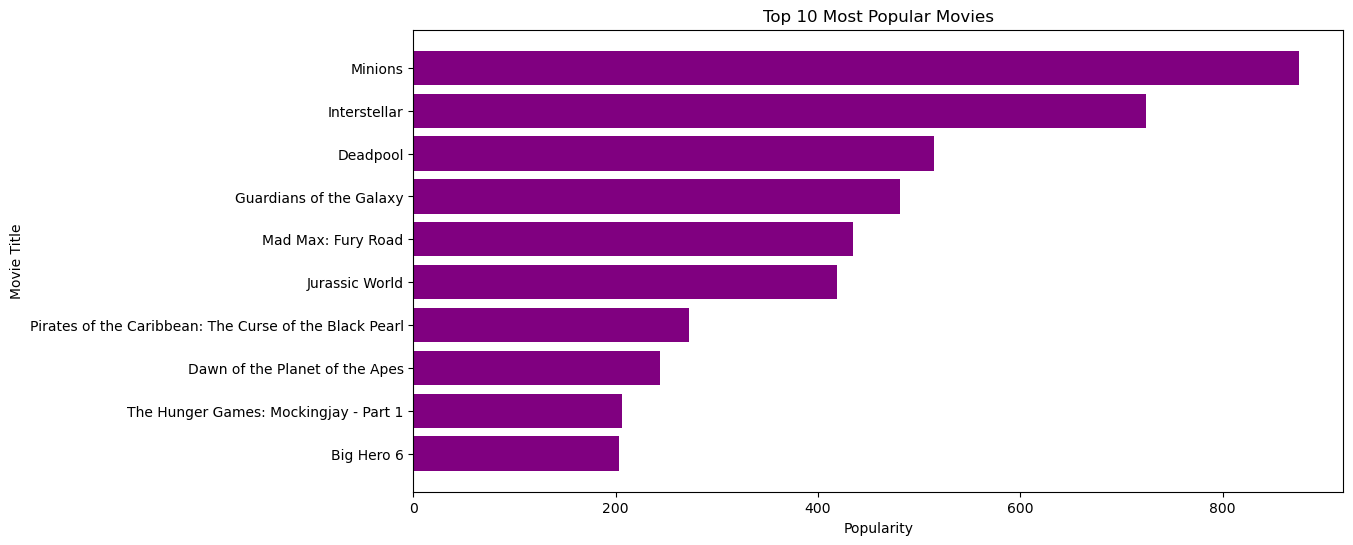

In [20]:
# Get the top 10 most popular movies
top_popular_movies = movies[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

# Plot top 10 popular movies
plt.figure(figsize=(12, 6))
plt.barh(top_popular_movies['title'], top_popular_movies['popularity'], color='purple')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()
plt.show()


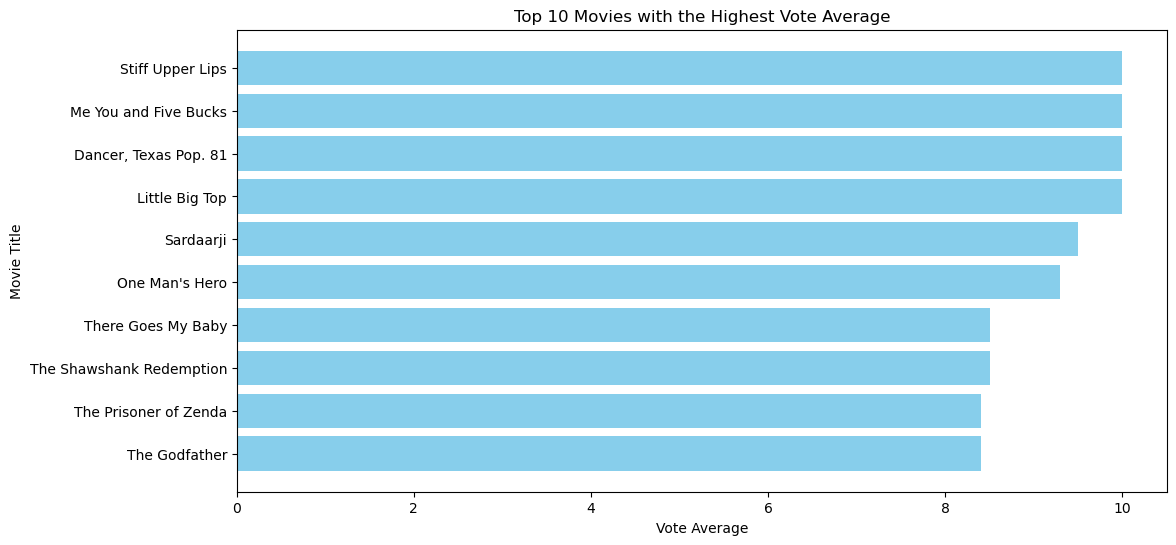

In [21]:
# Get top 10 movies with highest vote average
top_rated_movies = movies[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

# Plot top 10 rated movies
plt.figure(figsize=(12, 6))
plt.barh(top_rated_movies['title'], top_rated_movies['vote_average'], color='skyblue')
plt.title('Top 10 Movies with the Highest Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()
plt.show()


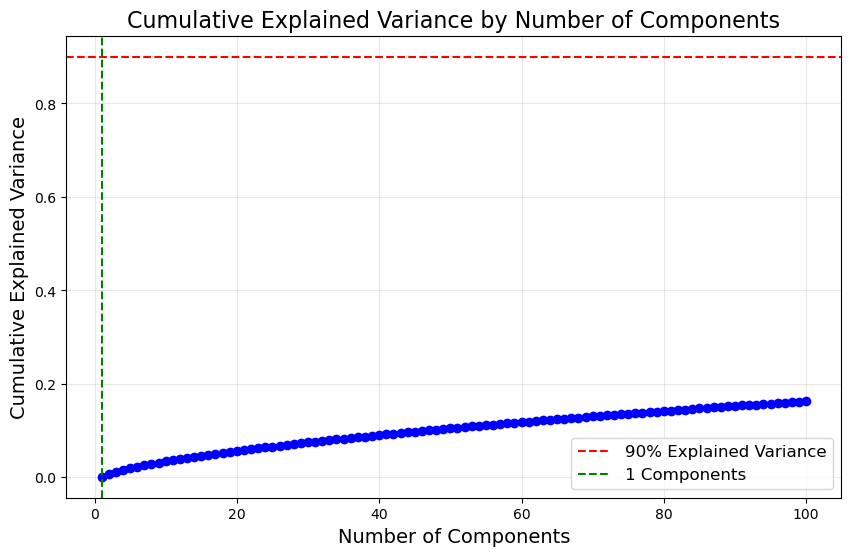

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import pickle
import requests
import streamlit as st
import time
from nltk.stem.porter import PorterStemmer

# Load data
movies = pd.read_csv('/Users/nandhinivijayakumar/Desktop/ADM/Project/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/nandhinivijayakumar/Desktop/ADM/Project/tmdb_5000_credits.csv')

# Merging data
movies = movies.merge(credits, on='title')
movies = movies[['movie_id', 'title', 'genres', 'original_language', 'release_date', 'overview', 'runtime', 'keywords', 'cast', 'crew', 'vote_average']]

# Dropping rows with null values
movies.dropna(inplace=True)

# Helper function to convert JSON columns into lists of strings
def convert(obj):
    return [i['name'] for i in ast.literal_eval(obj)]

# Apply conversion functions
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

# Process cast column (only top 3 cast members)
def convert3(obj):
    return [i['name'] for i in ast.literal_eval(obj)[:3]]

movies['cast'] = movies['cast'].apply(convert3)

# Extract director from crew
def fetch_director(obj):
    crew = ast.literal_eval(obj)
    directors = [i['name'] for i in crew if i['job'] == 'Director']
    return directors[0] if directors else None

movies['crew'] = movies['crew'].apply(fetch_director)

# Combine tags into a single string
movies['tags'] = (
    movies['overview'].fillna('') + ' ' +
    movies['genres'].apply(lambda x: " ".join(x)) + ' ' +
    movies['keywords'].apply(lambda x: " ".join(x)) + ' ' +
    movies['cast'].apply(lambda x: " ".join(x)) + ' ' +
    movies['crew'].fillna('')
)

# Clean the tags (remove empty or whitespace-only rows)
movies['tags'] = movies['tags'].apply(lambda x: x.strip().lower())
movies = movies[movies['tags'] != '']  # Remove empty tags

# Apply stemming to the tags
ps = PorterStemmer()
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])

movies['tags'] = movies['tags'].apply(stem)

# Remove any NaN or empty tags after stemming
movies = movies[movies['tags'].notna()]
movies = movies[movies['tags'].str.strip() != '']

# Vectorize the tags using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags']).toarray()

# Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=100, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)

# Calculate cosine similarity between the movies
similarity = cosine_similarity(svd_matrix)

# Save the models for later use
pickle.dump(movies.to_dict(), open('/Users/nandhinivijayakumar/Desktop/ADM/FinalProject_NandhiniVijayakumar/movie_dict.pkl', 'wb'))
pickle.dump(similarity, open('/Users/nandhinivijayakumar/Desktop/ADM/FinalProject_NandhiniVijayakumar/similarity.pkl', 'wb'))


import matplotlib.pyplot as plt
import numpy as np

# Get the cumulative explained variance ratio
explained_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')  # Mark 90% variance
plt.axvline(x=np.argmax(explained_variance >= 0.9) + 1, color='g', linestyle='--', label=f'{np.argmax(explained_variance >= 0.9) + 1} Components')  # Mark the corresponding component count
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# Function to fetch movie posters from TMDb API
def fetch_poster(movie_id):
    api_key = '020b311fe0559698373a16008dc6a672'
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    data = response.json()
    return "https://image.tmdb.org/t/p/w500/" + data.get('poster_path', '')

# Function to get movie recommendations
def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    recommended_movies = []
    recommended_movies_posters = []
    for x in movies_list:
        movie_id = movies.iloc[x[0]].movie_id
        recommended_movies.append(movies.iloc[x[0]].title)
        recommended_movies_posters.append(fetch_poster(movie_id))
    
    return recommended_movies, recommended_movies_posters

# Example usage
# recommendation, posters = recommend("The Dark Knight")
# print(recommendation, posters)


In [2]:
# Function to get top TF-IDF words for a specific movie
def get_top_tfidf_features(movie_title, n=10):
    if movie_title not in movies['title'].values:
        print(f"Movie '{movie_title}' not found!")
        return

    # Get the index of the movie
    movie_index = movies[movies['title'] == movie_title].index[0]
    
    # Extract the TF-IDF row for this movie
    movie_tfidf_row = tfidf_matrix[movie_index]
    
    # Get feature names
    feature_names = tfidf.get_feature_names_out()
    
    # Pair feature names with their scores and sort
    tfidf_scores = sorted(zip(feature_names, movie_tfidf_row), key=lambda x: x[1], reverse=True)
    
    # Print top N features
    print(f"Top {n} TF-IDF Features for '{movie_title}':")
    for word, score in tfidf_scores[:n]:
        print(f"{word}: {score}")

# Example usage
get_top_tfidf_features("The Dark Knight", n=10)


Top 10 TF-IDF Features for 'The Dark Knight':
batman: 0.37069078388640575
crimin: 0.25070702272962914
gotham: 0.24712718925760382
district: 0.21997063287334748
attorney: 0.21556771353273288
mastermind: 0.21421684846162017
chao: 0.20706519968433382
crime: 0.1936133747130328
super: 0.18373379297516076
organ: 0.17507785952222873


In [3]:
from sklearn.metrics import mean_squared_error

# Reconstruct the matrix using SVD
reconstructed_matrix = svd.inverse_transform(svd_matrix)

# Calculate Mean Squared Error
mse = mean_squared_error(tfidf_matrix, reconstructed_matrix)

# Print the MSE
print(f"Mean Squared Error (MSE) between original and reconstructed matrix: {mse:.4f}")


Mean Squared Error (MSE) between original and reconstructed matrix: 0.0002
